### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

自变量是给出的word与color是否匹配，因变量是回答时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

**假设：**

$\mu_0$: 测试对象在Congruent测试时反应时间的总体均值

$\mu_1$: 测试对象在Incongruent测试时反应时间总体均值

$\mu$: $\mu_1 - \mu_0$

$H_0$: $\mu = 0$

$H_1$: $\mu > 0$

**分析：**

根据初步观察，有两组数据，每组数据数据量为24，且数据来源是对同一群人，进行两次不同的实验，属于相关样本。

假设数据符合正态性假定与方差齐性假定，则可以进行参数检验。（后续处理中有QQ图进行正态性检验部分，由于样本是相关样本，因此省略方差齐性检验）

根据上述条件以及备择假设，执行单侧配对T检验，确认在显著性水平$\alpha = 0.05$时是否接受$H_0$。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [7]:
# 在这里执行你的分析
# import packages
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

% matplotlib inline

# import data
df = pd.read_csv('stroopdata.csv')
df.info()
print(df.head())
print(df.describe())
print("std of Congruent is %f" % df.Congruent.std(ddof = 0))
print("std of Incongruent is %f" % df.Incongruent.std(ddof = 0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes
   Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803
       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000
std of Congruent is 3.484416
std of Incongruent is 4.696055


--答案写这里--

**数据集的描述性统计：**（以下均保留四位小数）

根据上述统计信息可以看出：

Congruent的平均数为14.0511，中位数为14.3565，标准差为3.4844

Incongruent的平均数为22.0159，中位数为21.0175，标准差为4.7971

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

Correlation between Congruent and Incongruent is 0.351820 


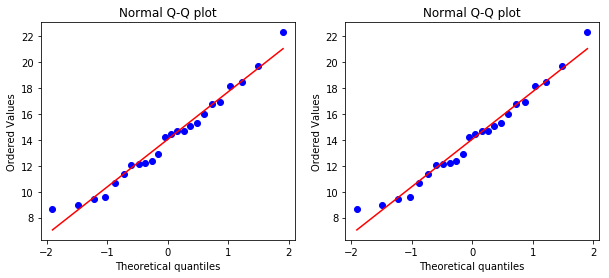

In [3]:
# 在这里创建可视化图表
# Extract data from dataframe
data_A = df['Congruent']
data_B = df['Incongruent']

# Check if two data distributed normally
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
stats.probplot(data_A, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.subplot(1,2,2)
stats.probplot(data_A, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
# Here we see two data distributed normally

# Check if two data is correlated
print("Correlation between Congruent and Incongruent is %f " % df['Congruent'].corr(df['Incongruent']))
# We can see here two data has a weak correlation, which can be ignored

# homogeneity test of variance
# We use levene test
#args = [data_A, data_B]
#w, p = stats.levene(*args)
#print("levene-test between two data is %f " % p)

--答案写这里--

样本数据通过了正态性检验与方差齐性检验。

从QQ图中可以直观看出，我们可以认为数据组按正态分布。

经过levene test，p值为0.6192，因此认为两组数据在显著性水平为0.05的情况下，方差齐性条件成立。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [27]:
# 在这里执行统计检验
# Now, we've done normally distribution test and homogeneity test of variance, we could do ttest
data = data_B - data_A
n = len(data)
df = n - 1
alpha = 0.05

d_mu = data.mean()
Std = data.std()
Ste = 1/math.sqrt(n)*Std
t_value = d_mu/math.sqrt(Std**2/n)
# Check table to find t_value of significance alpha
t_value_alpha = 1.714

print("Significance value is set as: %f" % alpha)
print("Mean of differences is: %f" % d_mu)
print("Standard deviation of differences is: %f" % Std)
print("Standard error of differences is: %f" % Ste)

print("Degree of freedom is: %f" % df)
print("t value is: %f" % t_value)
print("t value when p=0.05 is: %f" % t_value_alpha)
print("P value t_value > t_value_alpha, which means p value smaller than 0.05")

Significance value is set as: 0.050000
Mean of differences is: 7.964792
Standard deviation of differences is: 4.864827
Standard error of differences is: 0.993029
Degree of freedom is: 23.000000
t value is: 8.020707
t value when p=0.05 is: 1.714000
P value t_value > t_value_alpha, which means p value smaller than 0.05


--答案写这里--

**结论：**

我们使用了单侧配对配对$T$检验，从检验结果我们可以看出自由度为23，$t$值为$8.020707$,由于在自由度为23时查表表明p值小于0.0005，可以选择查找$p=0.05$，自由度23时的t值，为1.714，因此在显著性水平$0.05$的情况下，我们拒绝原假设$H_0$。

由上述分析，认为备择假设$\mu>0$成立。


### 对Q6的探索

造成上述现象的原因可能是实际信息需要进行加工才能进行正确反映，即字面信息对视觉信息有一定的干扰效应。当字面信息与视觉信息不一致时，会产生类似效应。以此为基础，发展出了Day - Night Stroo等试验。

# Reference
- 显著性检验详尽教程：http://www.cnblogs.com/hdu-zsk/p/6293721.html
- 选择假设检验的方法：https://wenku.baidu.com/view/65261ef2bed5b9f3f80f1c2b.html
- QQ plot：https://baike.baidu.com/item/QQPlot图/4050730?fr=aladdin
- 正态分布检验：https://baijiahao.baidu.com/s?id=1576170415472417226&wfr=spider&for=pc
- Stroop效应与相关试验：https://zhidao.baidu.com/question/428233473423880652.html